# Exercises

---

## Exercise 1: structured and ustructured images
Write a function that outputs the number of PC you have to choose to retain a given percentage of explained variance.
Use this funtion on the  handwritten digit data, and plot the number of PC needed to retain a certain fraction of EVR, for a few vaules of EVR.

Compare this curve to the one you can obtain in unstructured images: either generate images with the same shape of our data or randomly permute the pixels in each image independenlty. How does the number of PC needed to retain a certain fraction of the variance in this case compare to the number needed for digit images?

In [1]:
import numpy as np
from scipy import io
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [2]:
# download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/lRY2FvS7P3TMPwI')

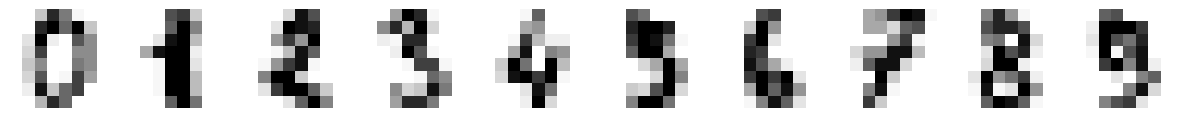

In [3]:
# load image data
dataset = load_digits()
images = dataset.data

#plot first 10 images
plt.figure(figsize=(15,7))
for i,img in enumerate(images[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys)
    plt.axis('off')
    


In [4]:
# defines a scaler objects
scaler = StandardScaler()
# z-score with fit_transform method
X =scaler.fit_transform(images)

In [5]:
pca = PCA()
pca.fit(X)

PCA()

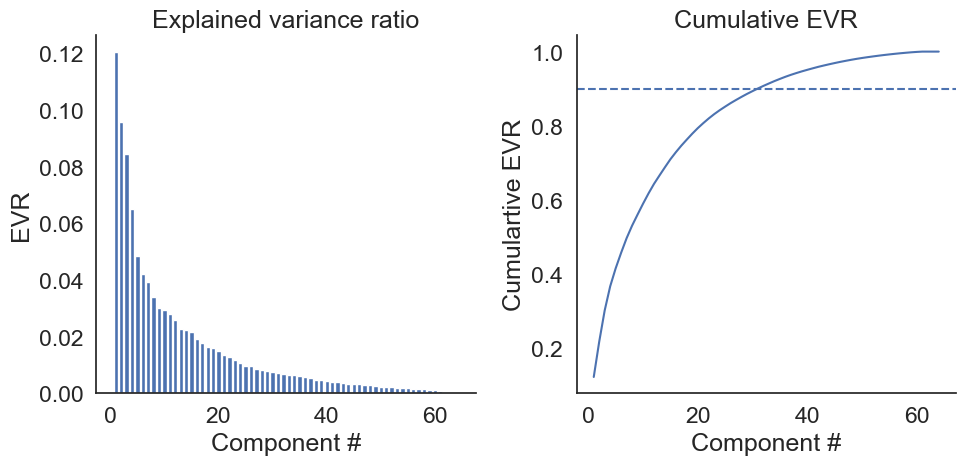

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Explained variance ratio')
plt.xlabel('Component #')
plt.ylabel('EVR')
plt.bar(np.arange(1,len(pca.components_)+1),pca.explained_variance_ratio_)

plt.subplot(1,2,2)
plt.title('Cumulative EVR')
plt.xlabel('Component #')
plt.ylabel('Cumulartive EVR')
plt.plot(np.arange(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.9,linestyle='--')

plt.tight_layout()


In [7]:
print(images.shape)
print(images[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


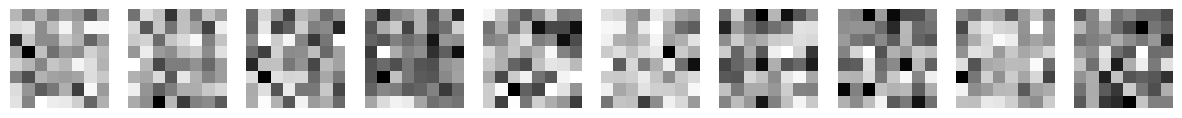

In [8]:
unstructered_images = np.random.normal(0,1,images.shape)
#plot first 10 images
plt.figure(figsize=(15,7))
for i,img in enumerate(unstructered_images[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys)
    plt.axis('off')

In [9]:
# defines a scaler objects
scaler = StandardScaler()
# z-score with fit_transform method
X =scaler.fit_transform(unstructered_images)

In [10]:
pca = PCA()
pca.fit(X)

PCA()

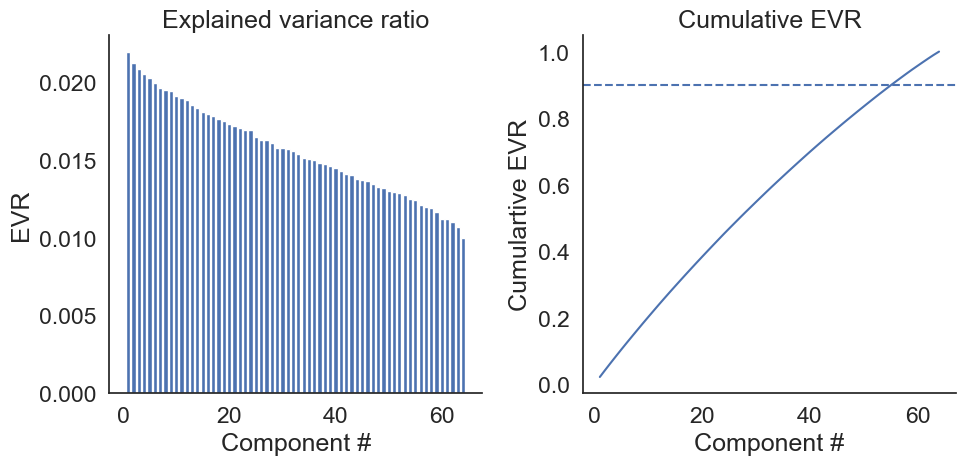

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Explained variance ratio')
plt.xlabel('Component #')
plt.ylabel('EVR')
plt.bar(np.arange(1,len(pca.components_)+1),pca.explained_variance_ratio_)

plt.subplot(1,2,2)
plt.title('Cumulative EVR')
plt.xlabel('Component #')
plt.ylabel('Cumulartive EVR')
plt.plot(np.arange(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.9,linestyle='--')

plt.tight_layout()


So for unstructured images the cumulative EVR grow linearly with componenents, while for structured images it grows exponentially. This is because the information in structured images is concentrated in a few components, while in unstructured images it is spread out over all components. For this reason, the number of components needed to retain a certain fraction of the variance is much smaller for structured images than for unstructured images.

## Exercise 2: cortical dynamics

Work with the cortical data we used in the lesson. Write some code that lets you easily chose a specific behavioural event from the `trial_data` dictionary (the recorded events are `CSp` for positive conditioned stimulus, `CSn` for negative conditioned stimulus and `licks` for lick events), one of the principal components, an onset time and and offset time, and plots the timecourse of this component in the selected period around the chosen event type.

Use this code to explore the data: how do different components behave? Do you notice any patterns? How would you test for the statistical significance of the effects that you see (if any)?

In [12]:
import pickle

with open('./data/behaviour.pickle', 'rb') as handle:
    trial_data = pickle.load(handle)

voltage_signal = np.load('./data/voltage_signal.npy')
cortex_mask = np.load('./data/cortex_mask.npy')

In [13]:
print(trial_data.keys())

dict_keys(['CSp', 'CSn', 'Lick', 'frames'])


In [14]:
X = voltage_signal.transpose(2,0,1) # reshape in time x image format
T,h,w = X.shape # saves time, height and width for future use
X = X[:,cortex_mask] # select only cortex pixels, returns a flattened image

In [15]:
pca = PCA(n_components=50);
pca.fit(X)

PCA(n_components=50)

Text(0, 0.5, 'EVR')

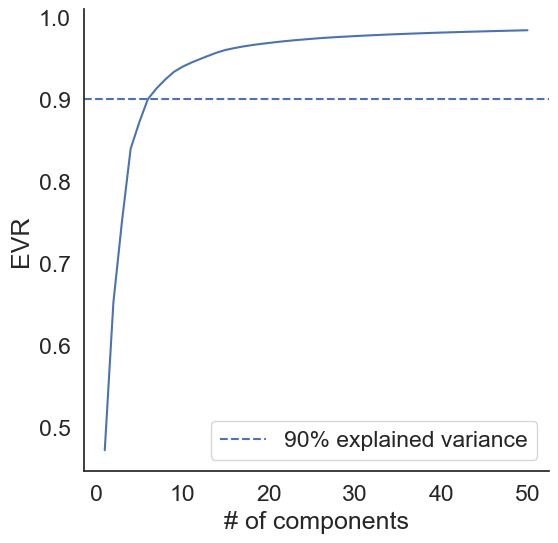

In [16]:
evr = pca.explained_variance_ratio_
c_evr = np.cumsum(evr)
plt.figure(figsize=(6,6))
plt.axhline(0.9,linestyle='--',label='90% explained variance')
plt.plot(range(1,len(c_evr)+1),c_evr)
plt.legend()
plt.xlabel('# of components')
plt.ylabel('EVR')

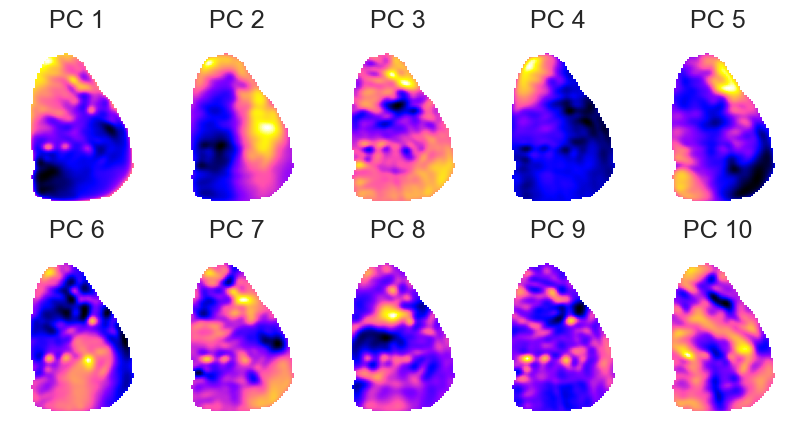

In [17]:
PCs = pca.components_[:10]

plt.figure(figsize=(10,5))
for i, pc in enumerate(PCs):
    plt.subplot(2,5,i+1)
    plt.title(f'PC {i+1}')
    reshaped_pc = np.full((h,w),np.nan)
    reshaped_pc[np.where(cortex_mask)] = pc
    plt.imshow(reshaped_pc,aspect='auto',cmap=plt.cm.gnuplot2)
    plt.axis('off')
    

In [18]:
comp = 9 #component to plot
behavorial_event = 'Lick' #event to plot (choose from 'Lick', 'CSp' and 'CSn)

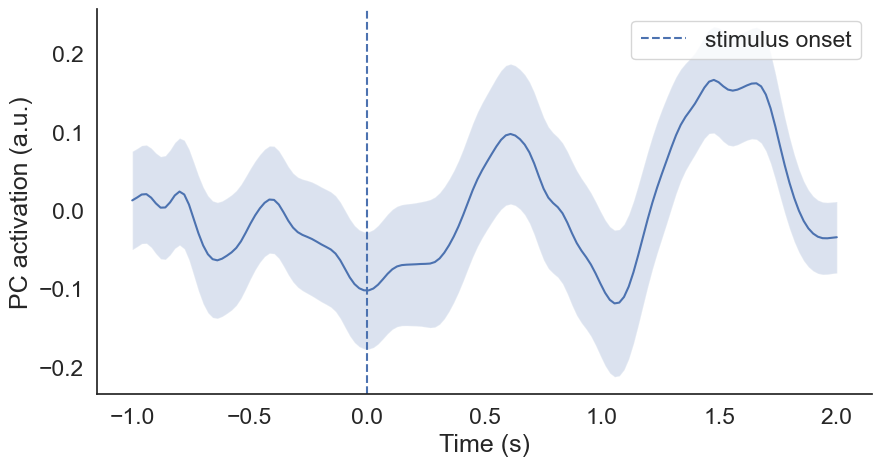

In [19]:
from scipy.stats import sem

PCs = pca.components_[:10,:].T # select and transpose first 10 PCs weights
Y = X @ PCs # compute the PC timecourse, by projecting the original data on each component

framerate = 50. #in Hz
start_time = -1. #seconds, relative to stimulus onset
end_time = 2. #seconds, relative to stimulus offset

frame_times = trial_data['frames'] #frame times

peri_Y = [] #empty list for peri-lick timecourses

#cycle over licking onsets
for i in trial_data[behavorial_event]:
    onset_frame = np.argmin(abs(frame_times-i)) #take frame closest to onset
    start_frame = int(onset_frame + framerate*start_time/1.000) # compute starting frame
    end_frame = int(onset_frame + framerate*end_time/1.000) # compute ending frame
    peri_Y.append(Y[start_frame:end_frame]) #saves the slice of Y

peri_Y = np.asarray(peri_Y) 

mean_Y = np.mean(peri_Y,axis=0) #average over stimli
error = sem(peri_Y,axis=0) #compute sem over stimuli
from scipy.ndimage import gaussian_filter1d



plt.figure(figsize=(10,5))
t = np.linspace(start_time,end_time,int((end_time-start_time)*framerate))
y = mean_Y[:,comp-1]
err = error[:,comp-1]

y = gaussian_filter1d(y,2)
err = gaussian_filter1d(err,2)

plt.plot(t,y)
plt.fill_between(t,y-err,y+err,alpha=0.2)

plt.xlabel('Time (s)')
plt.ylabel('PC activation (a.u.)')

plt.axvline(x=0,linestyle='--',label='stimulus onset')
plt.legend()
#plt.axvline(x=2,linestyle='--')
#plt.axvline(x=3,linestyle='--')

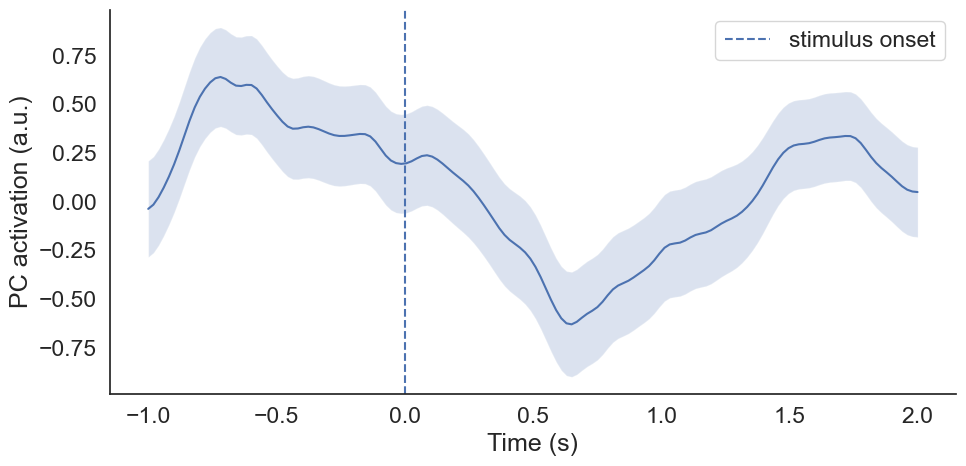

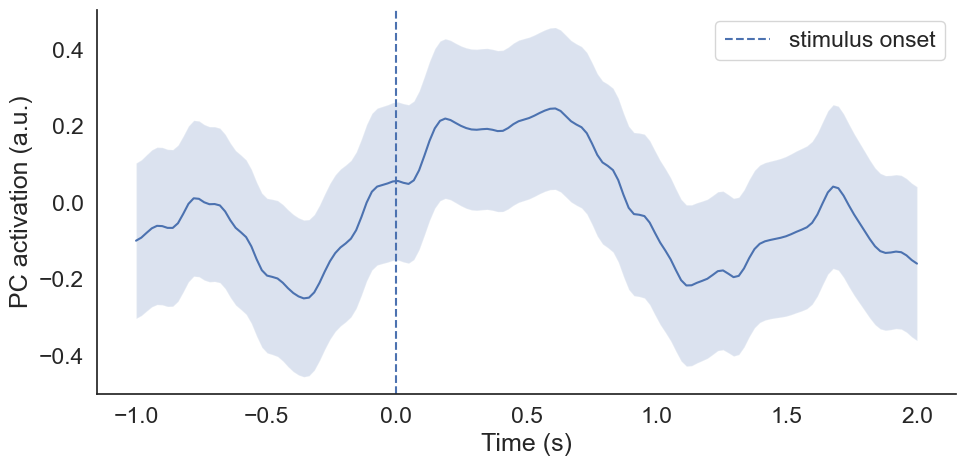

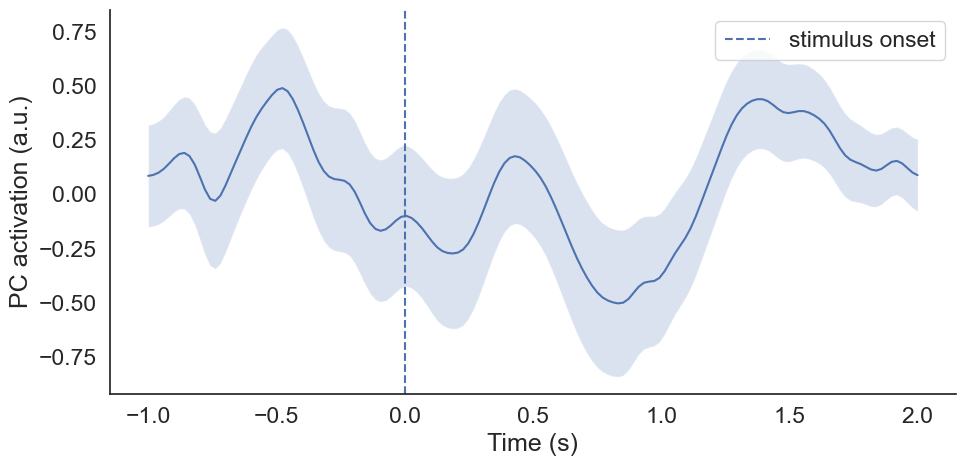

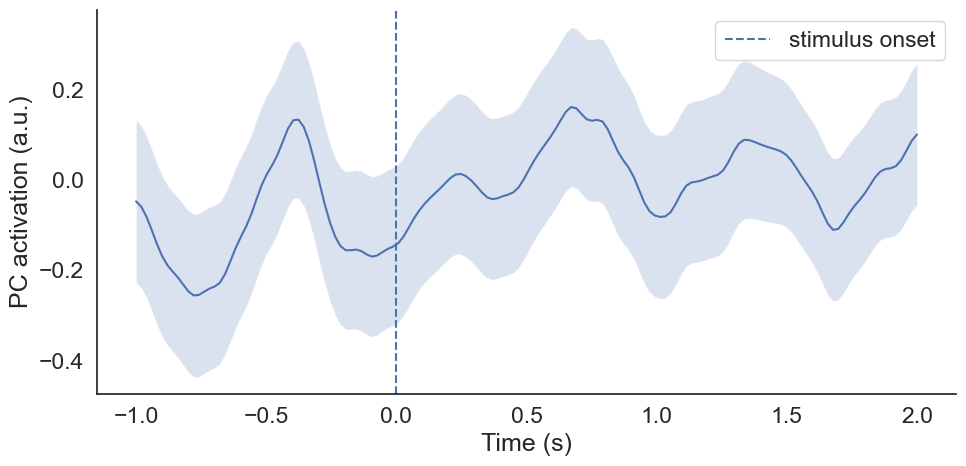

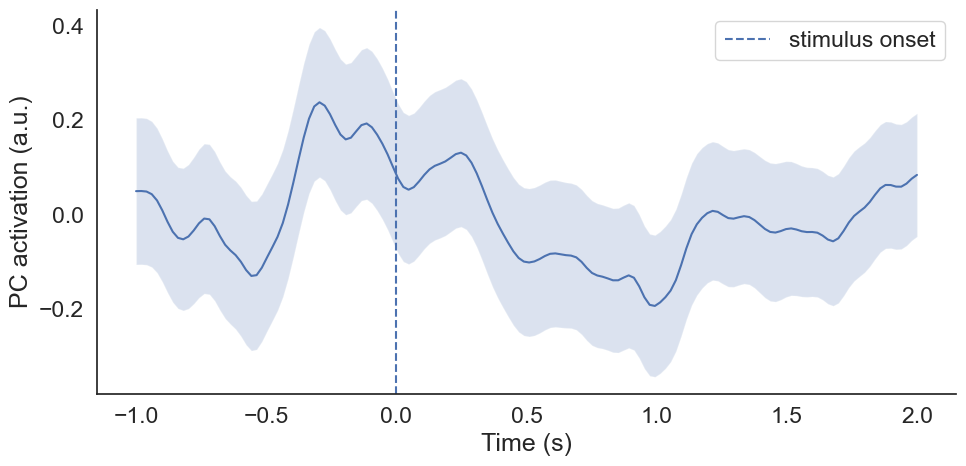

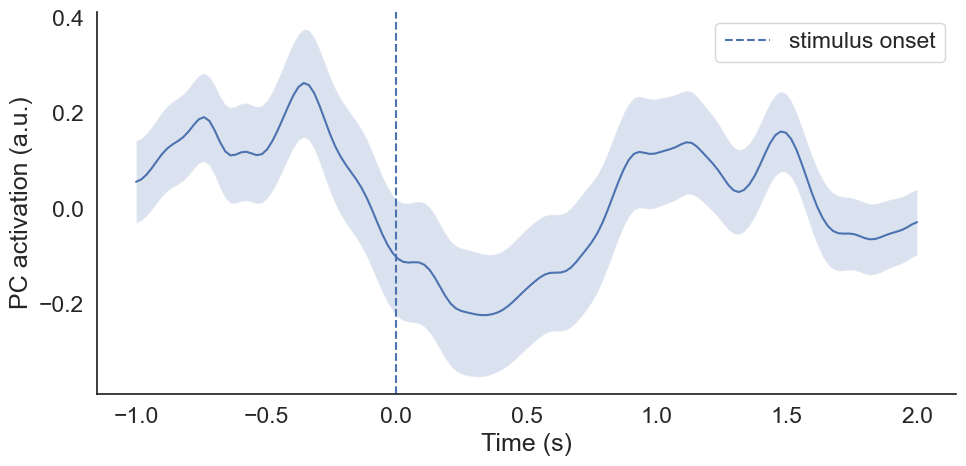

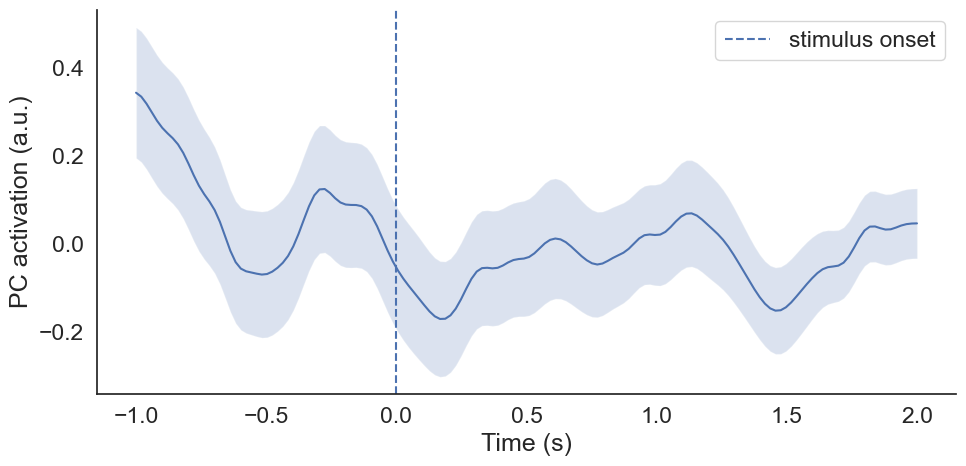

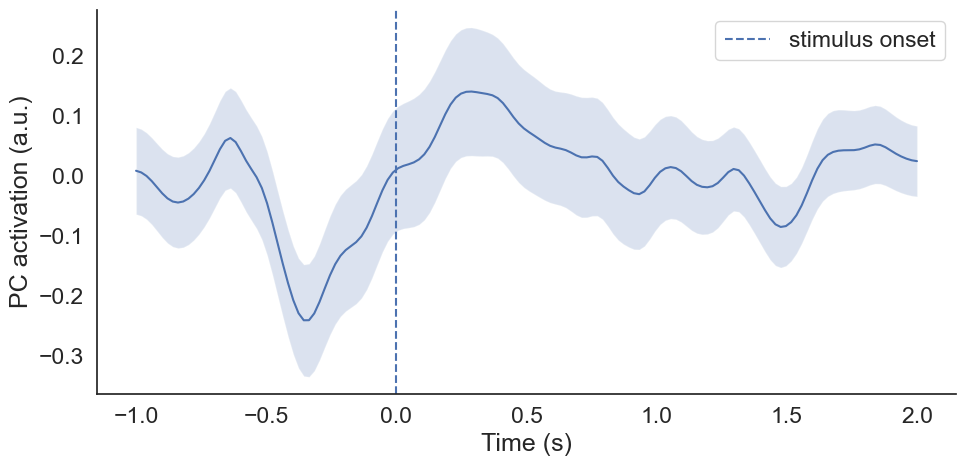

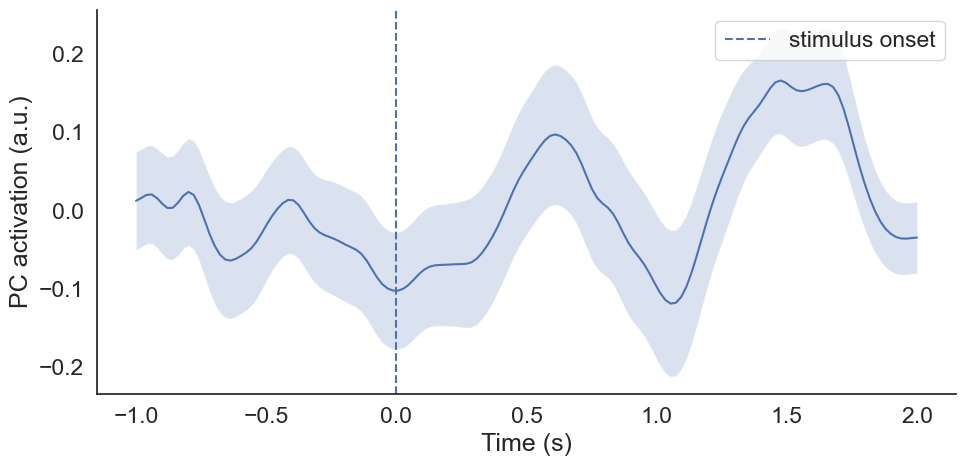

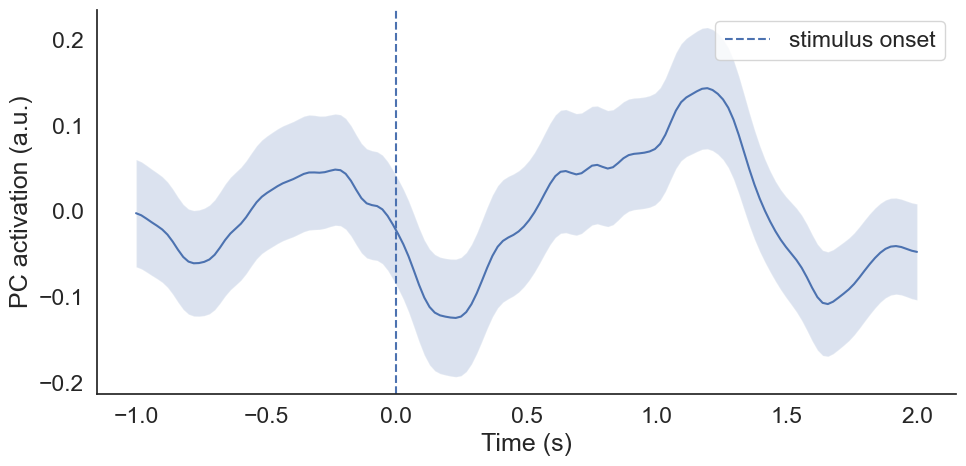

In [20]:
comp = [1,2,3,4,5,6,7,8,9,10] #component to plot
behavorial_event = 'Lick' #event to plot (choose from 'Lick', 'CSp' and 'CSn)

from scipy.stats import sem

for comp in comp:

    PCs = pca.components_[:10,:].T # select and transpose first 10 PCs weights
    Y = X @ PCs # compute the PC timecourse, by projecting the original data on each component

    framerate = 50. #in Hz
    start_time = -1. #seconds, relative to stimulus onset
    end_time = 2. #seconds, relative to stimulus offset

    frame_times = trial_data['frames'] #frame times

    peri_Y = [] #empty list for peri-lick timecourses

    #cycle over licking onsets
    for i in trial_data[behavorial_event]:
        onset_frame = np.argmin(abs(frame_times-i)) #take frame closest to onset
        start_frame = int(onset_frame + framerate*start_time/1.000) # compute starting frame
        end_frame = int(onset_frame + framerate*end_time/1.000) # compute ending frame
        peri_Y.append(Y[start_frame:end_frame]) #saves the slice of Y

    peri_Y = np.asarray(peri_Y) 

    mean_Y = np.mean(peri_Y,axis=0) #average over stimli
    error = sem(peri_Y,axis=0) #compute sem over stimuli
    from scipy.ndimage import gaussian_filter1d



    
    plt.figure(figsize=(10,5))
    t = np.linspace(start_time,end_time,int((end_time-start_time)*framerate))
    y = mean_Y[:,comp-1]
    err = error[:,comp-1]

    y = gaussian_filter1d(y,2)
    err = gaussian_filter1d(err,2)

    plt.plot(t,y)
    plt.fill_between(t,y-err,y+err,alpha=0.2)

    plt.xlabel('Time (s)')
    plt.ylabel('PC activation (a.u.)')

    plt.axvline(x=0,linestyle='--',label='stimulus onset')
    plt.legend()
    plt.tight_layout()  

In [21]:
comp = 9 #component to plot
behavorial_event = 'CSp' #event to plot (choose from 'Lick', 'CSp' and 'CSn)

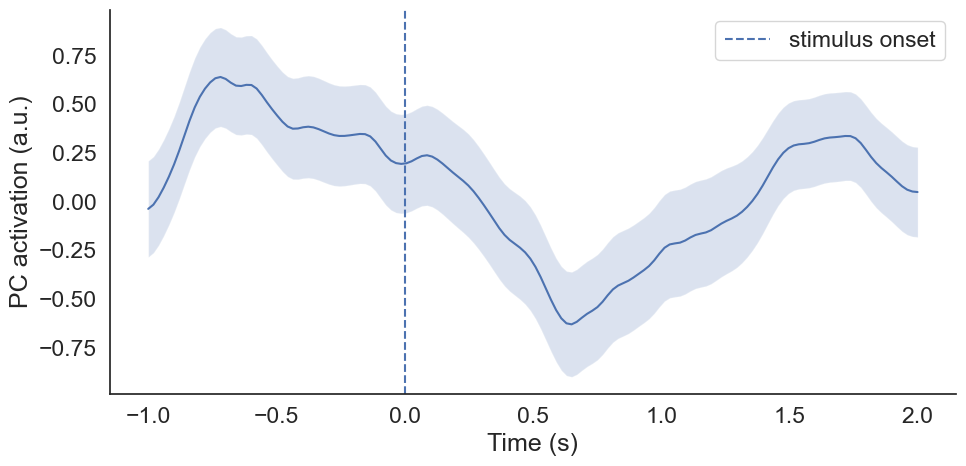

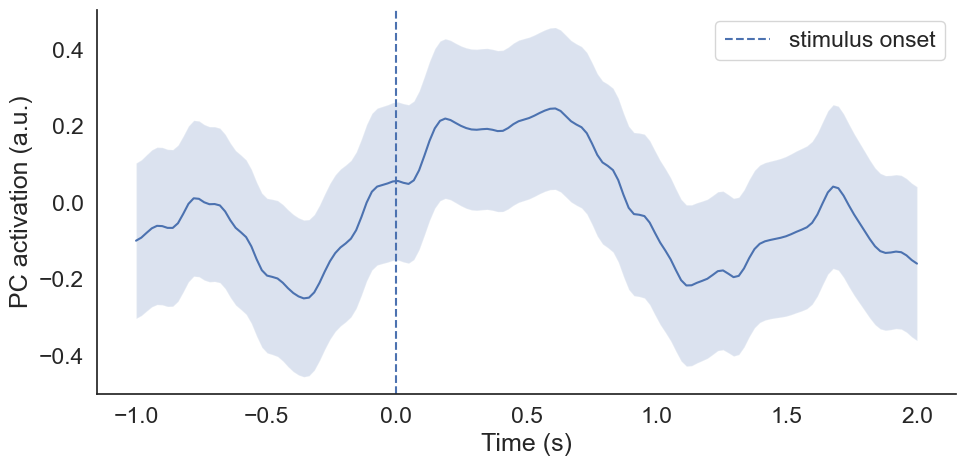

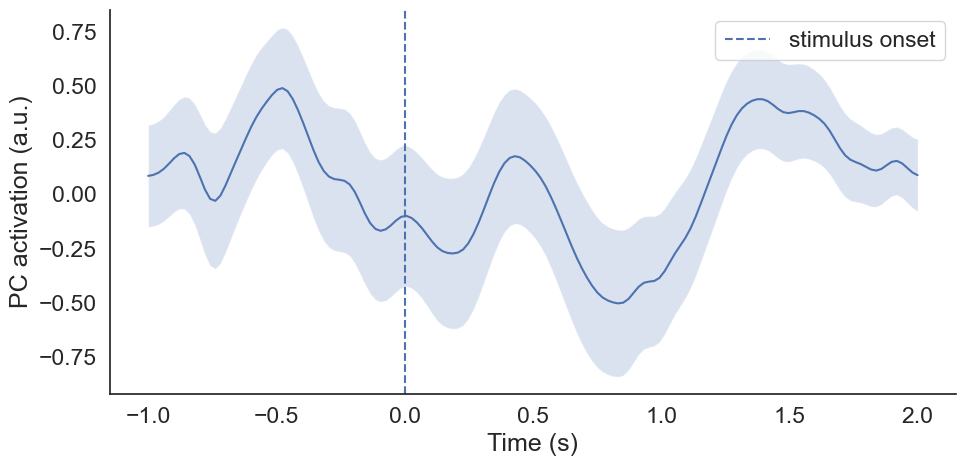

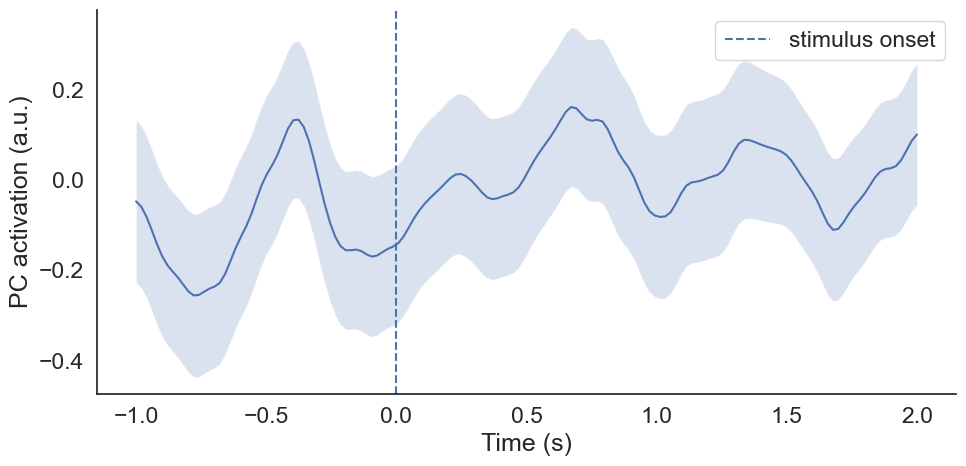

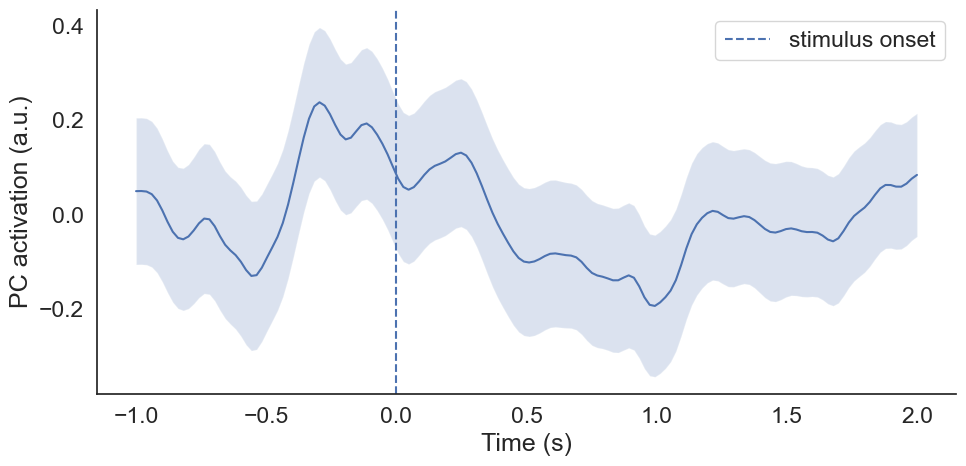

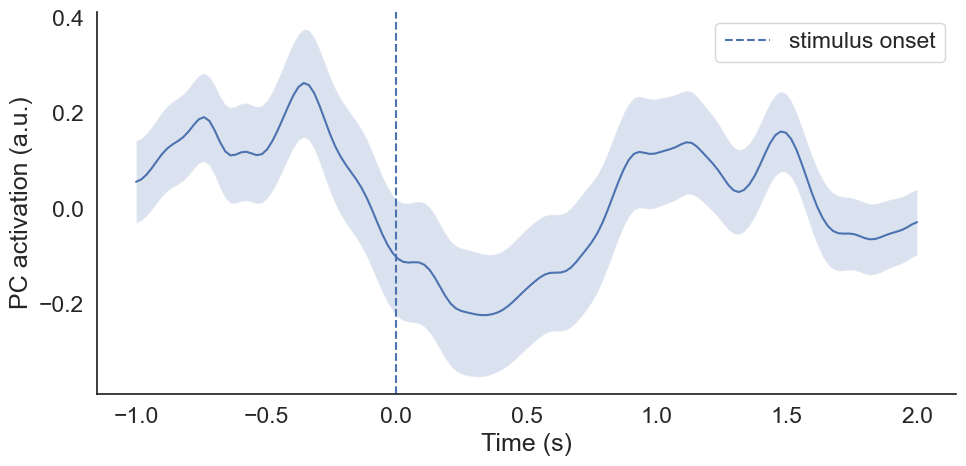

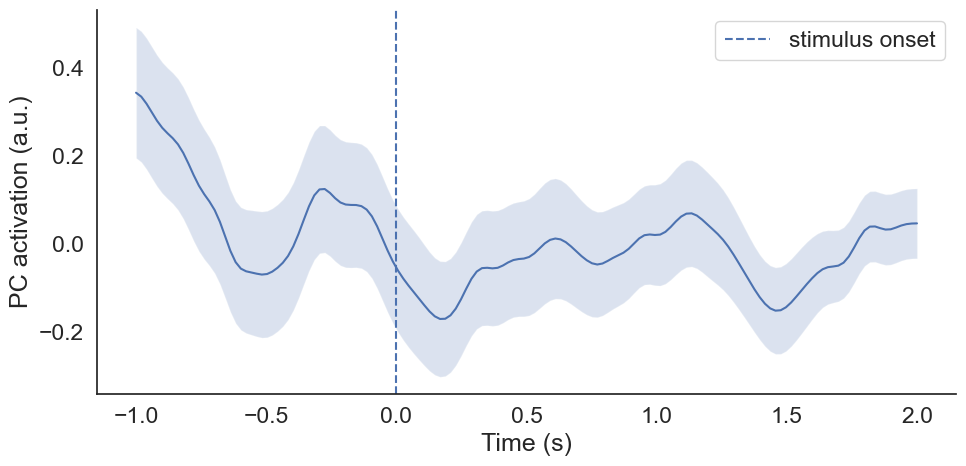

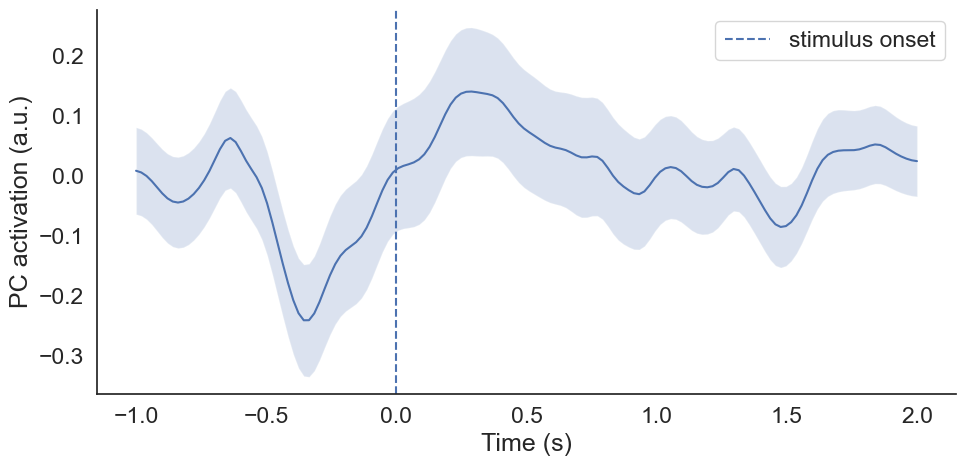

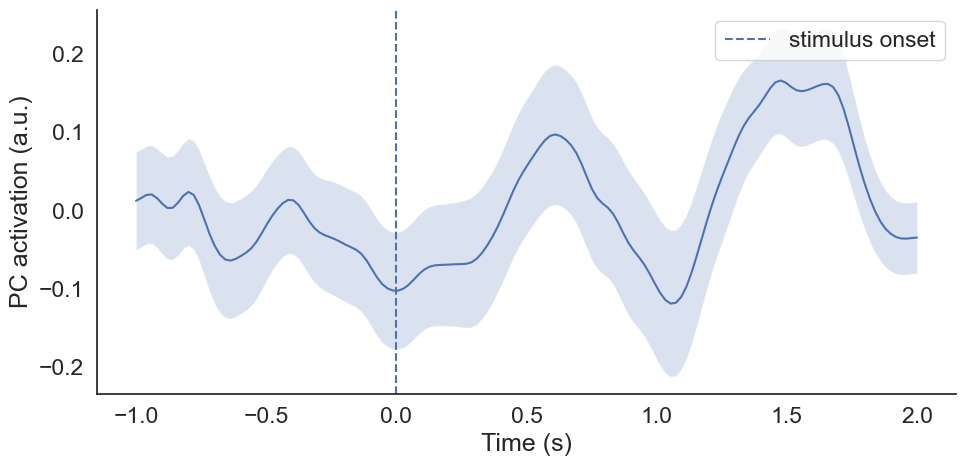

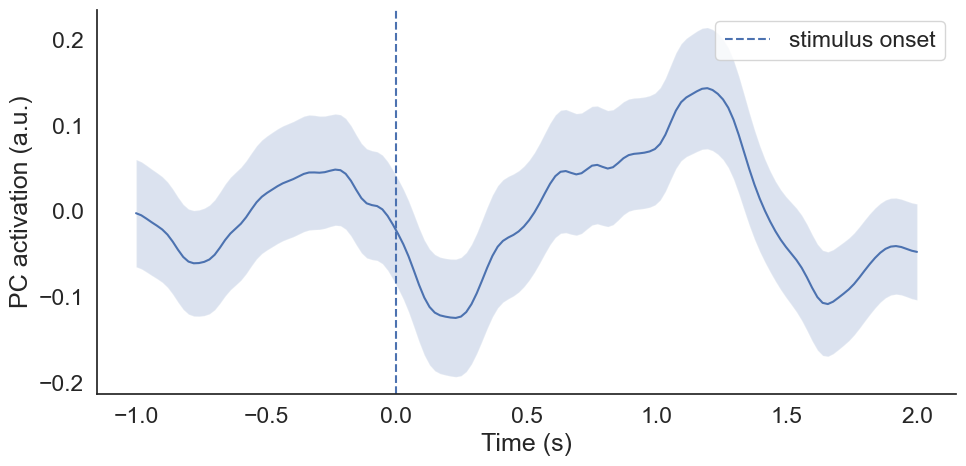

In [22]:
comp = [1,2,3,4,5,6,7,8,9,10] #component to plot
behavorial_event = 'Lick' #event to plot (choose from 'Lick', 'CSp' and 'CSn)

from scipy.stats import sem

for comp in comp:

    PCs = pca.components_[:10,:].T # select and transpose first 10 PCs weights
    Y = X @ PCs # compute the PC timecourse, by projecting the original data on each component

    framerate = 50. #in Hz
    start_time = -1. #seconds, relative to stimulus onset
    end_time = 2. #seconds, relative to stimulus offset

    frame_times = trial_data['frames'] #frame times

    peri_Y = [] #empty list for peri-lick timecourses

    #cycle over licking onsets
    for i in trial_data[behavorial_event]:
        onset_frame = np.argmin(abs(frame_times-i)) #take frame closest to onset
        start_frame = int(onset_frame + framerate*start_time/1.000) # compute starting frame
        end_frame = int(onset_frame + framerate*end_time/1.000) # compute ending frame
        peri_Y.append(Y[start_frame:end_frame]) #saves the slice of Y

    peri_Y = np.asarray(peri_Y) 

    mean_Y = np.mean(peri_Y,axis=0) #average over stimli
    error = sem(peri_Y,axis=0) #compute sem over stimuli
    from scipy.ndimage import gaussian_filter1d



    
    plt.figure(figsize=(10,5))
    t = np.linspace(start_time,end_time,int((end_time-start_time)*framerate))
    y = mean_Y[:,comp-1]
    err = error[:,comp-1]

    y = gaussian_filter1d(y,2)
    err = gaussian_filter1d(err,2)

    plt.plot(t,y)
    plt.fill_between(t,y-err,y+err,alpha=0.2)

    plt.xlabel('Time (s)')
    plt.ylabel('PC activation (a.u.)')

    plt.axvline(x=0,linestyle='--',label='stimulus onset')
    plt.legend()
    plt.tight_layout()  

In [23]:
comp = 9 #component to plot
behavorial_event = 'CSn' #event to plot (choose from 'Lick', 'CSp' and 'CSn)

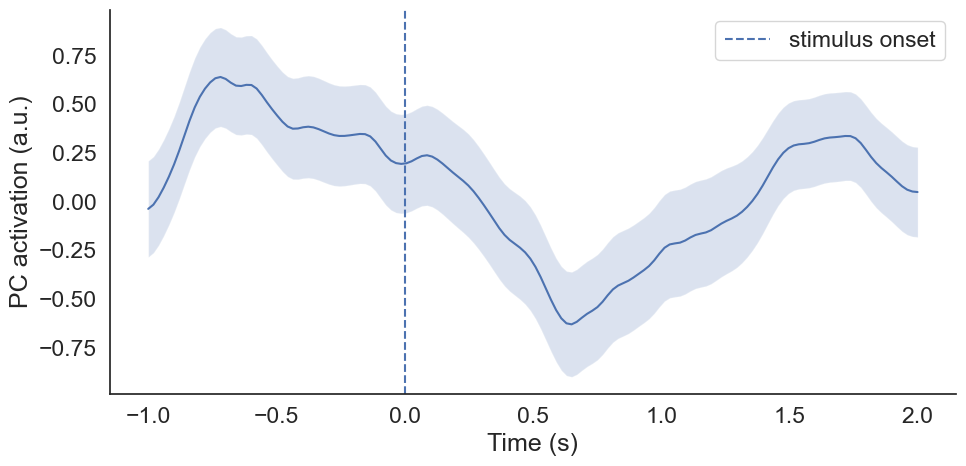

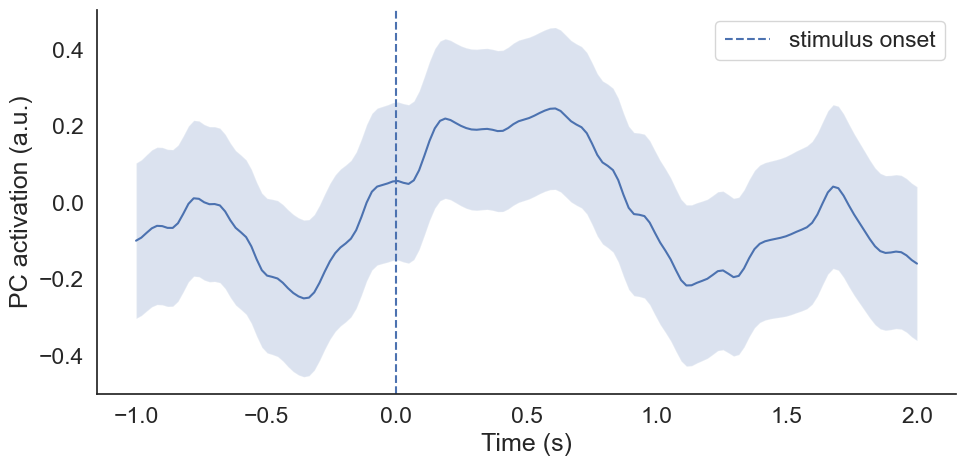

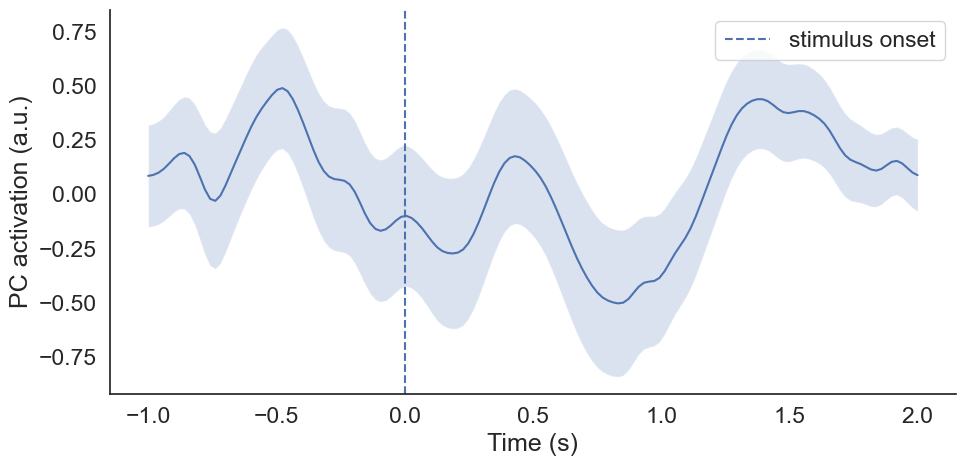

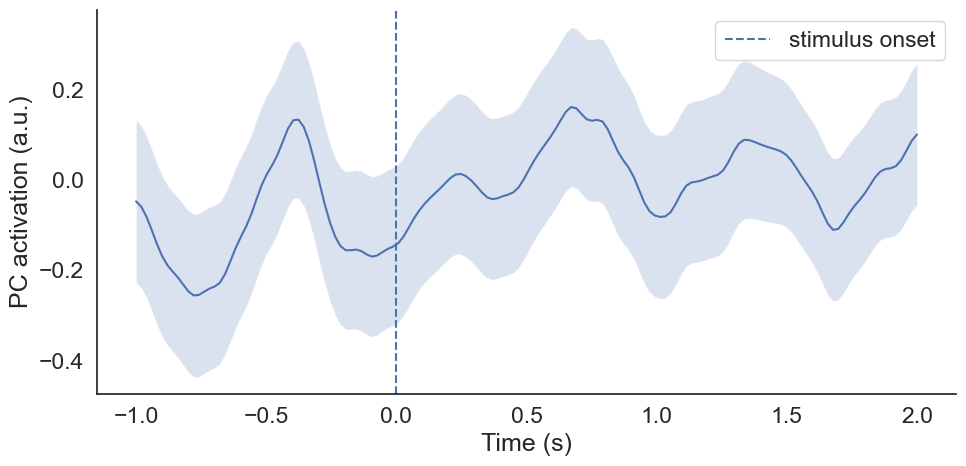

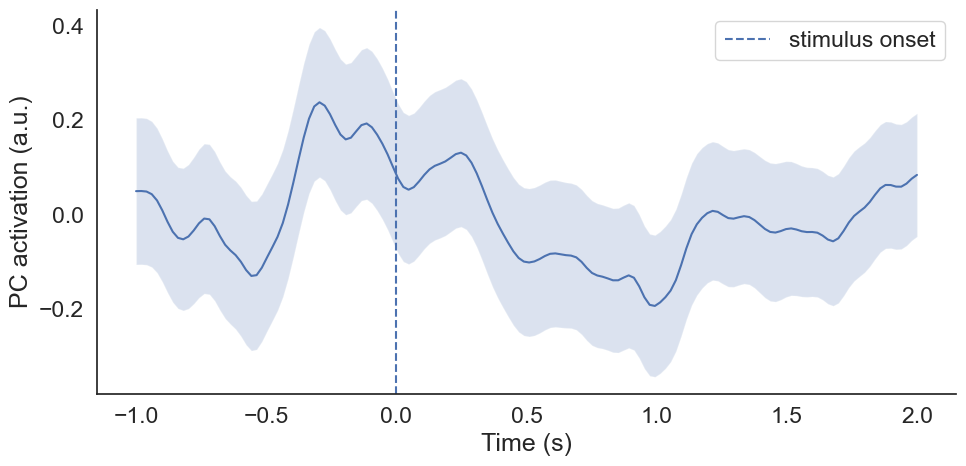

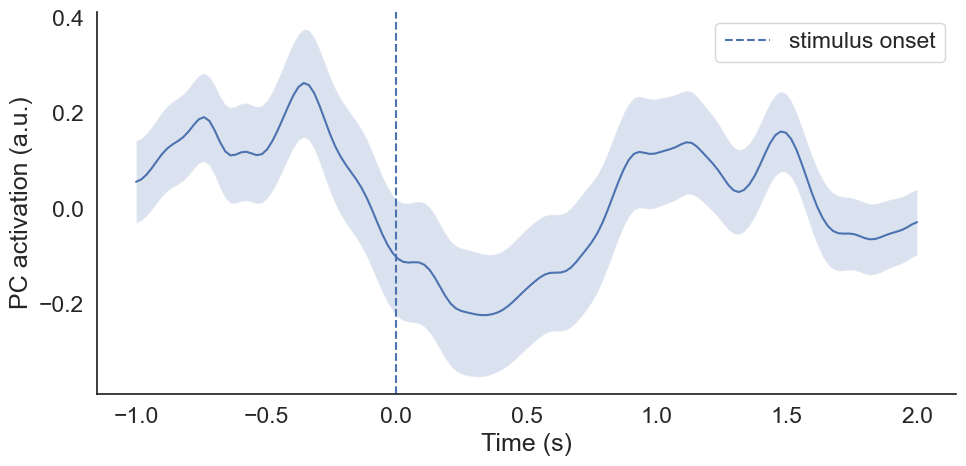

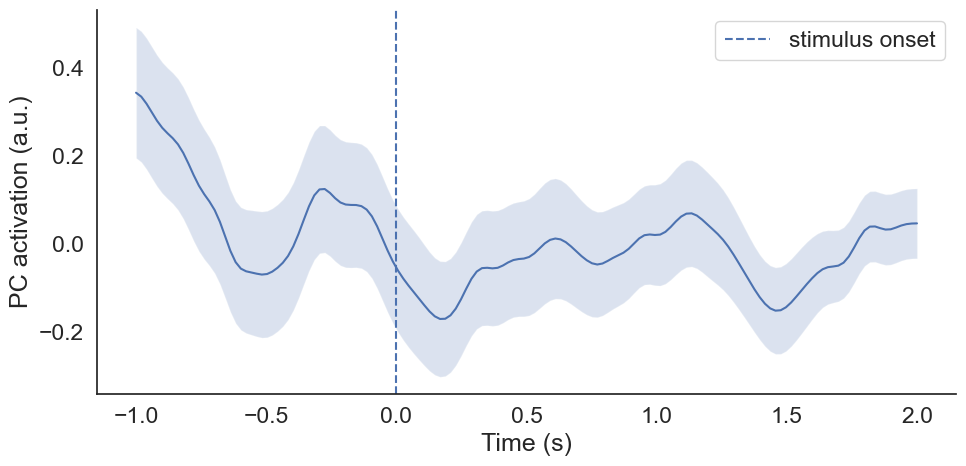

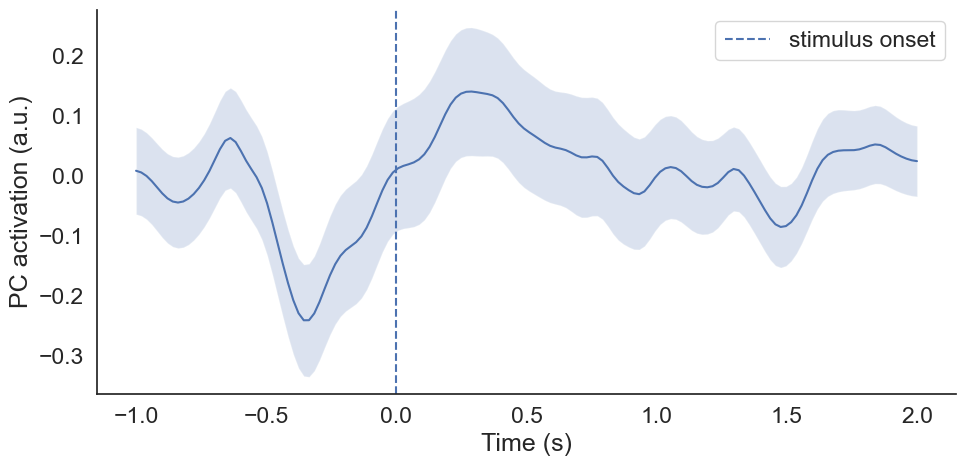

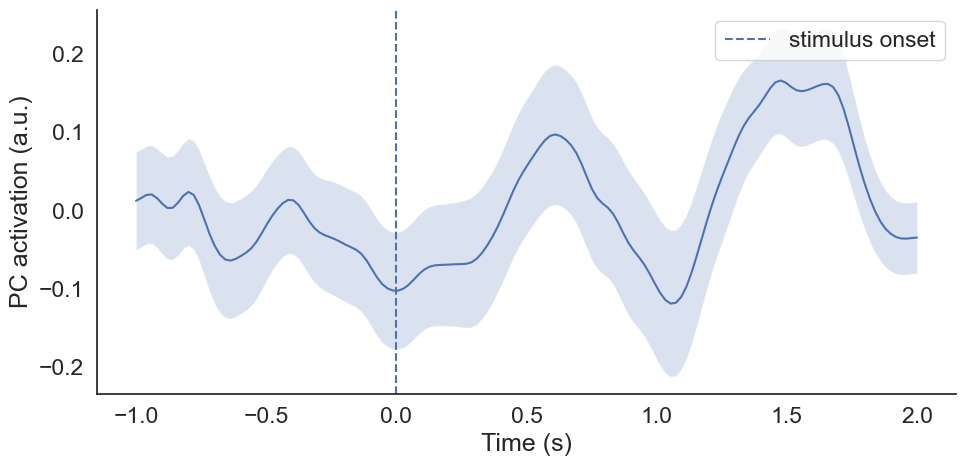

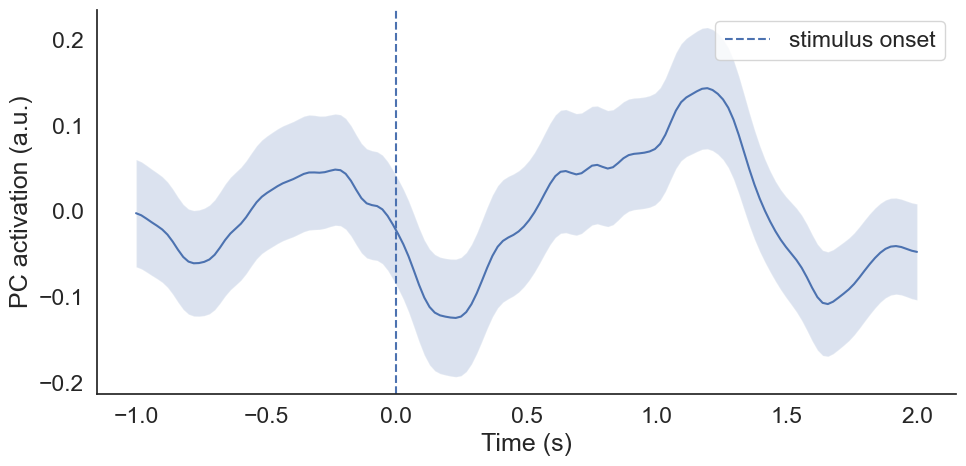

In [24]:
comp = [1,2,3,4,5,6,7,8,9,10] #component to plot
behavorial_event = 'Lick' #event to plot (choose from 'Lick', 'CSp' and 'CSn)

from scipy.stats import sem

for comp in comp:

    PCs = pca.components_[:10,:].T # select and transpose first 10 PCs weights
    Y = X @ PCs # compute the PC timecourse, by projecting the original data on each component

    framerate = 50. #in Hz
    start_time = -1. #seconds, relative to stimulus onset
    end_time = 2. #seconds, relative to stimulus offset

    frame_times = trial_data['frames'] #frame times

    peri_Y = [] #empty list for peri-lick timecourses

    #cycle over licking onsets
    for i in trial_data[behavorial_event]:
        onset_frame = np.argmin(abs(frame_times-i)) #take frame closest to onset
        start_frame = int(onset_frame + framerate*start_time/1.000) # compute starting frame
        end_frame = int(onset_frame + framerate*end_time/1.000) # compute ending frame
        peri_Y.append(Y[start_frame:end_frame]) #saves the slice of Y

    peri_Y = np.asarray(peri_Y) 

    mean_Y = np.mean(peri_Y,axis=0) #average over stimli
    error = sem(peri_Y,axis=0) #compute sem over stimuli
    from scipy.ndimage import gaussian_filter1d



    
    plt.figure(figsize=(10,5))
    t = np.linspace(start_time,end_time,int((end_time-start_time)*framerate))
    y = mean_Y[:,comp-1]
    err = error[:,comp-1]

    y = gaussian_filter1d(y,2)
    err = gaussian_filter1d(err,2)

    plt.plot(t,y)
    plt.fill_between(t,y-err,y+err,alpha=0.2)

    plt.xlabel('Time (s)')
    plt.ylabel('PC activation (a.u.)')

    plt.axvline(x=0,linestyle='--',label='stimulus onset')
    plt.legend()
    plt.tight_layout()  

The components behave differently around different events. For example, some components might show a strong response to the positive conditioned stimulus, while others might show a strong response to the negative conditioned stimulus and some show a strong response to licks. To test for the statistical significance of these effects, we could perfrom a permutation test, where we shuffle the event labels and see if the observed effects are significantly different from the null case.

## Exercise 3: nonlinear dimensionality reduction

Using the MNIST digit dataset, explore the effect of hyperparameters on the result of nonlinear dimensionality reduction methods.

- Change the `perplexity` and `exageration` parameters in `TNSE` (one at a time). Graphically compare the results of different values.
- Change the neighbourhood size in `Isomap` (set by the parameter `n_neighbors`), and visualize how the results change.

Finally, try to apply one or more of these methods to the cortical data we used in the lessons. How do the data look in two dimensions? Do any cluster seem to appear? Are they robust with respect to hyperparameter choice?

Text(0, 0.5, 'X2')

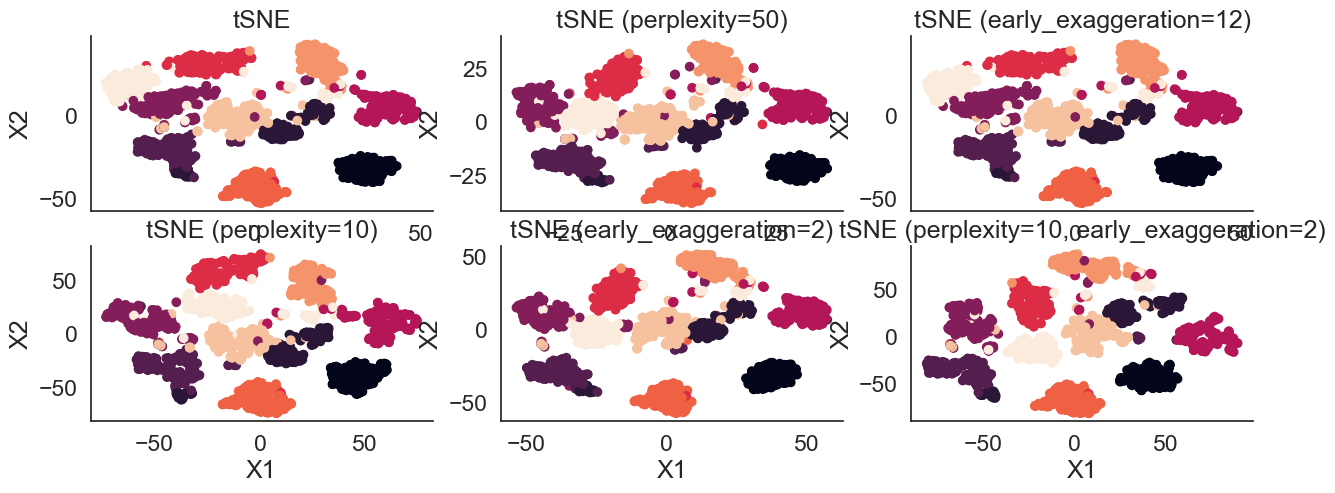

In [25]:

from sklearn.manifold import TSNE



# load and preprocess data
dataset = load_digits()
images = dataset.data
X = StandardScaler().fit_transform(images)

# initialize embedding calculator
tsne = TSNE(n_components=2,random_state=0)
tsne2 = TSNE(n_components=2,random_state=0,perplexity=50) #defeult perplexity is 30
tsne3 = TSNE(n_components=2,random_state=0,early_exaggeration=12) #default early_exaggeration is 4
tsne4 = TSNE(n_components=2,random_state=0,perplexity =10)
tsne5 = TSNE(n_components=2,random_state=0,early_exaggeration=2)
tsne6 = TSNE(n_components=2,random_state=0,perplexity =10,early_exaggeration=2)

#fit emebddings and transform data
X_tsne = tsne.fit_transform(X)
X_tsne2 = tsne2.fit_transform(X)
X_tsne3 = tsne3.fit_transform(X)
X_tsne4 = tsne4.fit_transform(X)
X_tsne5 = tsne5.fit_transform(X)
X_tsne6 = tsne6.fit_transform(X)

plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=dataset.target)
plt.title('tSNE')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2,3,2)
plt.scatter(X_tsne2[:,0],X_tsne2[:,1],c=dataset.target)
plt.title('tSNE (perplexity=50)')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2,3,3)
plt.scatter(X_tsne3[:,0],X_tsne3[:,1],c=dataset.target)
plt.title('tSNE (early_exaggeration=12)')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2,3,4)
plt.scatter(X_tsne4[:,0],X_tsne4[:,1],c=dataset.target)
plt.title('tSNE (perplexity=10)')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2,3,5)
plt.scatter(X_tsne5[:,0],X_tsne5[:,1],c=dataset.target)
plt.title('tSNE (early_exaggeration=2)')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(2,3,6)
plt.scatter(X_tsne6[:,0],X_tsne6[:,1],c=dataset.target)
plt.title('tSNE (perplexity=10, early_exaggeration=2)')
plt.xlabel('X1')
plt.ylabel('X2')








Text(0, 0.5, 'X2')

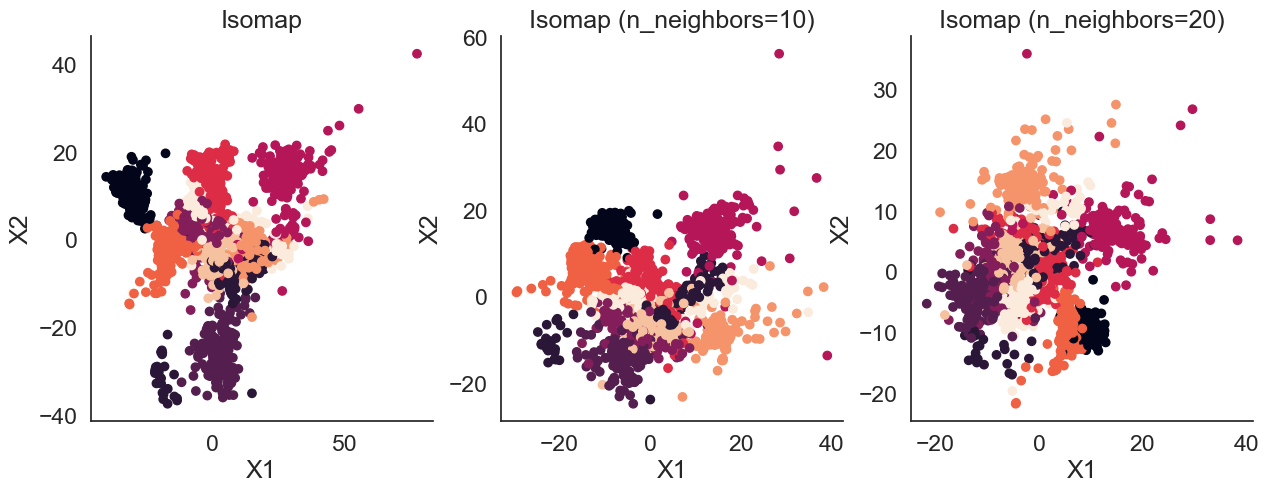

In [26]:
from sklearn.manifold import Isomap

# initialize embedding calculator
isomap = Isomap(n_components=2)
isomap2 = Isomap(n_components=2,n_neighbors=10) #default n_neighbors is 5
isomap3 = Isomap(n_components=2,n_neighbors=20)

#fit emebddings and transform data
X_isomap = isomap.fit_transform(X)
X_isomap2 = isomap2.fit_transform(X)
X_isomap3 = isomap3.fit_transform(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(X_isomap[:,0],X_isomap[:,1],c=dataset.target)
plt.title('Isomap')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1,3,2)
plt.scatter(X_isomap2[:,0],X_isomap2[:,1],c=dataset.target)
plt.title('Isomap (n_neighbors=10)')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(1,3,3)
plt.scatter(X_isomap3[:,0],X_isomap3[:,1],c=dataset.target)
plt.title('Isomap (n_neighbors=20)')
plt.xlabel('X1')
plt.ylabel('X2')





In [27]:
import pickle

with open('./data/behaviour.pickle', 'rb') as handle:
    trial_data = pickle.load(handle)

voltage_signal = np.load('./data/voltage_signal.npy')
cortex_mask = np.load('./data/cortex_mask.npy')

In [30]:
X = voltage_signal.transpose(2,0,1) # reshape in time x image format
T,h,w = X.shape # saves time, height and width for future use
X = X[:,cortex_mask] # select only cortex pixels, returns a flattened image

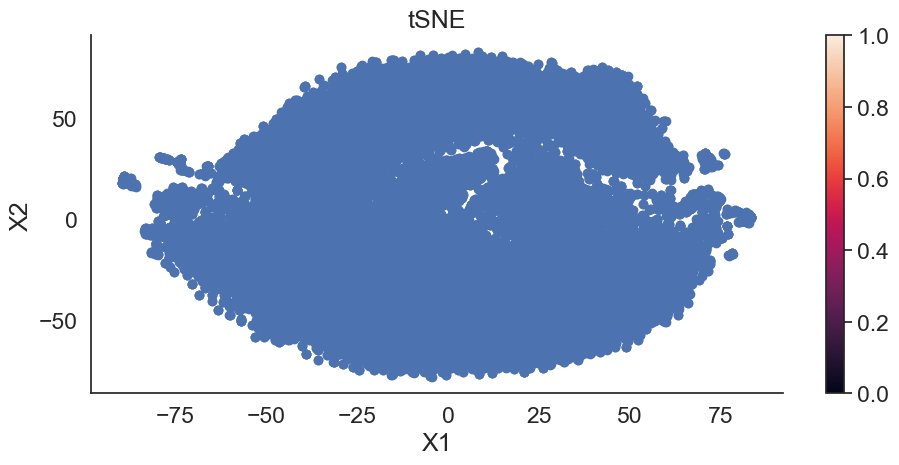

In [33]:

tsne = TSNE(n_components=2,random_state=0)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(X_tsne[:,0],X_tsne[:,1])
plt.title('tSNE')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar()
plt.tight_layout()




The data looks unstructured in two dimensions, with no clear clusters. The results are not robust with respect to hyperparameter choice, as the data is high-dimensional and nonlinear, and the methods are sensitive to the choice of hyperparameter.